In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
import os

arnaudfadja_african_plums_quality_and_defect_assessment_data_path = kagglehub.dataset_download('arnaudfadja/african-plums-quality-and-defect-assessment-data')

print('Data source import complete.')
print(f"Le dataset a √©t√© t√©l√©charg√© dans le dossier : {arnaudfadja_african_plums_quality_and_defect_assessment_data_path}")

# Vous pouvez maintenant lister le contenu du dossier :
if arnaudfadja_african_plums_quality_and_defect_assessment_data_path:
    for item in os.listdir(arnaudfadja_african_plums_quality_and_defect_assessment_data_path):
        print(f"- {item}")

    # Si vous savez qu'il y a un sous-dossier 'train' par exemple :
    train_folder = os.path.join(arnaudfadja_african_plums_quality_and_defect_assessment_data_path, 'train')
    if os.path.isdir(train_folder):
        print(f"\nContenu du dossier 'train' :")
        for item in os.listdir(train_folder):
            print(f"-- {item}")


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 290M/290M [00:14<00:00, 21.1MB/s]

Extracting files...


Data source import complete.
Le dataset a √©t√© t√©l√©charg√© dans le dossier : /root/.cache/kagglehub/datasets/arnaudfadja/african-plums-quality-and-defect-assessment-data/versions/1
- african_plums_dataset


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sns
import random
import shutil
from pathlib import Path
from tqdm import tqdm
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import Subset, Dataset, DataLoader
from torch import nn, optim
from transformers import AutoImageProcessor, ViTForImageClassification
from torch import nn, optim
import timm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input/'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#elements = os.listdir('/kaggle/working')
#print(elements)

# 1) Chargement des donn√©es

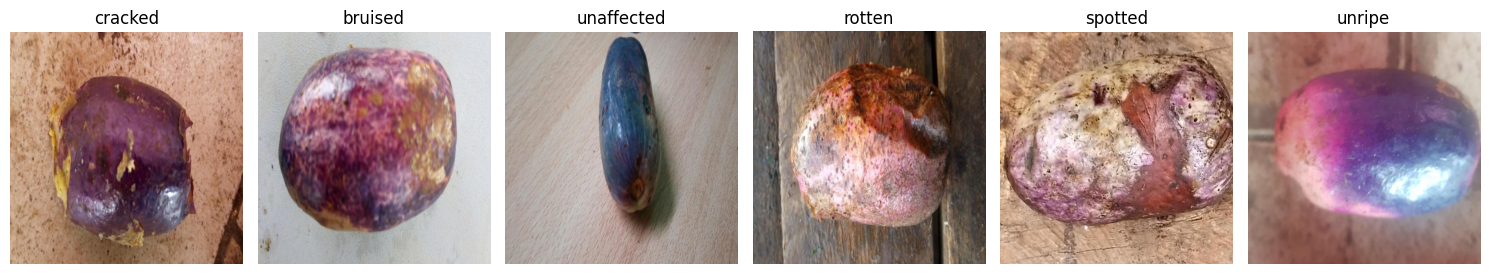

In [10]:
#repertoire racine
path = '/root/.cache/kagglehub/datasets/arnaudfadja/african-plums-quality-and-defect-assessment-data/versions/1/african_plums_dataset'

# Chemin du dossier contenant les sous-dossiers
dossier_images = os.path.join(path, 'african_plums')

# Obtenir les sous-dossiers
classes = [os.path.join(dossier_images, nom) for nom in os.listdir(dossier_images) if os.path.isdir(os.path.join(dossier_images, nom))]

# Cr√©er une figure avec 1 ligne et 6 colonnes
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Afficher une image de chaque dossier
for ax, dossier in zip(axes, classes[:6]):  # Limiter √† 6 dossiers
    # Charger la premi√®re image du dossier
    images = os.listdir(dossier)
    if images:
        image_path = os.path.join(dossier, images[55])  # Prendre la premi√®re image
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')  # Masquer les axes
        ax.set_title(os.path.basename(dossier))  # Titre avec le nom du dossier

# Afficher la figure
plt.tight_layout()
plt.show()

In [11]:
# Chemin du dossier contenant le fichier CSV
nom_fichier = 'organized_plums_data_new.csv'

# Construire le chemin complet du fichier
chemin_fichier = os.path.join(path, nom_fichier)

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(chemin_fichier)

df.sample(10)

Image ID      Label Defect Type
648       rotten_plum_168  defective      rotten
1351     spotted_plum_151  defective     spotted
1593     spotted_plum_393  defective     spotted
921       rotten_plum_441  defective      rotten
3939      unripe_plum_259     unripe      unripe
2871  unaffected_plum_912       good  unaffected
1305     spotted_plum_105  defective     spotted
4288      unripe_plum_608     unripe      unripe
4097      unripe_plum_417     unripe      unripe
3983      unripe_plum_303     unripe      unripe

In [12]:
df.shape

(4507, 3)

In [13]:
df.columns = ['Image_Id', 'Label', 'class']
df.sample(10)

Image_Id      Label       class
3325  unaffected_plum_1366       good  unaffected
2123   unaffected_plum_164       good  unaffected
3338  unaffected_plum_1379       good  unaffected
1031       rotten_plum_551  defective      rotten
3436  unaffected_plum_1477       good  unaffected
2355   unaffected_plum_396       good  unaffected
3155  unaffected_plum_1196       good  unaffected
4211       unripe_plum_531     unripe      unripe
269       bruised_plum_270  defective     bruised
766        rotten_plum_286  defective      rotten

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image_Id  4507 non-null   object
 1   Label     4507 non-null   object
 2   class     4507 non-null   object
dtypes: object(3)
memory usage: 105.8+ KB


In [15]:
df.isna().sum(axis=0)

Image_Id    0
Label       0
class       0
dtype: int64

In [16]:
df.duplicated().sum()
print(f"Nombre total de valeurs dupliqu√©es : {df.duplicated().sum()}")

Nombre total de valeurs dupliqu√©es : 0


In [17]:
print("Nombre total d'image pour chaque type de classe :")
df.groupby('class').size()

Nombre total d'image pour chaque type de classe :


class
bruised        319
cracked        162
rotten         720
spotted        759
unaffected    1721
unripe         826
dtype: int64

In [18]:
df.groupby('Label')['class'].agg(lambda x: list(set(x))).reset_index()

Label                                class
0  defective  [rotten, bruised, cracked, spotted]
1       good                         [unaffected]
2     unripe                             [unripe]

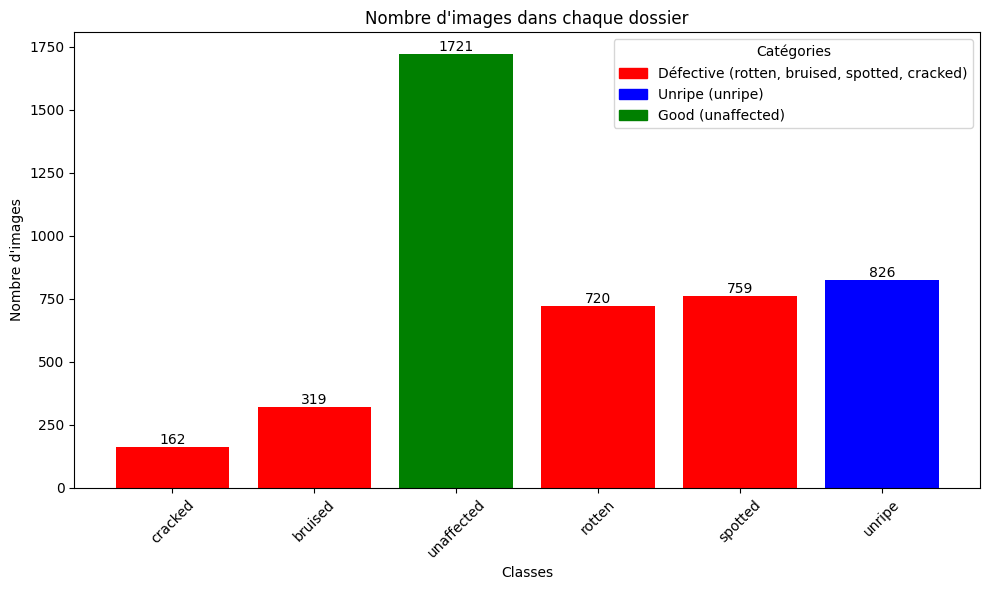

In [19]:
# Initialiser les listes pour les noms de dossiers et le nombre d'images
noms_dossiers = []
nombre_images = []

# Compter le nombre d'images dans chaque sous-dossier
for nom in os.listdir(dossier_images):
    chemin_dossier = os.path.join(dossier_images, nom)
    if os.path.isdir(chemin_dossier):
        images = [f for f in os.listdir(chemin_dossier) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        noms_dossiers.append(nom)
        nombre_images.append(len(images))

# D√©terminer les couleurs des barres
couleurs = ['red' if nom in ['rotten', 'bruised', 'spotted', 'cracked'] else 'blue' if nom == 'unripe' else 'green' for nom in noms_dossiers]

# Cr√©er l'histogramme
plt.figure(figsize=(10, 6))
ax = plt.bar(noms_dossiers, nombre_images, color=couleurs)

# Ajouter des √©tiquettes sur les barres
plt.bar_label(ax)

# Configurer les axes et le titre
plt.xlabel('Classes')
plt.ylabel('Nombre d\'images')
plt.title('Nombre d\'images dans chaque dossier')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajuster l'espacement
# Ajouter la l√©gende
plt.legend(
    handles=[
        plt.Rectangle((0, 0), 1, 1, color='red', label='D√©fective (rotten, bruised, spotted, cracked)'),
        plt.Rectangle((0, 0), 1, 1, color='blue', label='Unripe (unripe)'),
        plt.Rectangle((0, 0), 1, 1, color='green', label='Good (unaffected)')
    ],
    title='Cat√©gories'
)
plt.show()

# 2) Pr√©traitement des images

In [20]:
def compter_elements(chemin, display_element=False):
    try:
        # Lister les √©l√©ments dans le r√©pertoire
        elements = os.listdir(chemin)
        # Compter le nombre d'√©l√©ments
        nombre_elements = len(elements)

        if display_element:
            print(f"√âl√©ments du r√©pertoire : {elements}")

        print(f"Nombre d'√©l√©ments : {nombre_elements}")

    except FileNotFoundError:
        return "Le chemin sp√©cifi√© n'existe pas."
    except PermissionError:
        return "Acc√®s refus√© au chemin sp√©cifi√©."

In [21]:
compter_elements(path, True)

√âl√©ments du r√©pertoire : ['organized_plums_data_new.csv', 'african_plums', 'README.md']
Nombre d'√©l√©ments : 3


In [22]:
path

'/root/.cache/kagglehub/datasets/arnaudfadja/african-plums-quality-and-defect-assessment-data/versions/1/african_plums_dataset'

## 2.1) Configuration des chemins

In [23]:
# D√©finir les chemins
work_path = os.getcwd()
path_data = os.path.join(path, 'african_plums')  # Dossier source
data_use = os.path.join(work_path, '/data')            # Dossier cible
folder_model_1 = os.path.join(work_path, '/model_1')
folder_model_2 = os.path.join(work_path, '/model_2')
train_val_temp_1 = os.path.join(folder_model_1, 'train_val_temp_1')
train_val_temp_2 = os.path.join(folder_model_2, 'train_val_temp_2')
test_1 = os.path.join(folder_model_1, 'test_1')
test_2 = os.path.join(folder_model_2, 'test_2')

In [24]:
# Fonction pour cr√©er un dossier (et le recr√©er s'il existe)
def create_folder(path):
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"üóëÔ∏è Dossier existant supprim√© : {path}")
    os.makedirs(path)
    print(f"üìÅ Nouveau dossier cr√©√© : {path}")

# Cr√©ation des dossiers n√©cessaires
print("üîß Cr√©ation des dossiers requis...")
create_folder(data_use)
create_folder(folder_model_1)
create_folder(folder_model_2)
create_folder(train_val_temp_1)
create_folder(train_val_temp_2)
create_folder(test_1)
create_folder(test_2)

# Fonction pour copier les fichiers/dossiers avec barre de progression
def copy_with_progress(src, dst):
    if not os.path.exists(dst):
        os.makedirs(dst)

    items = os.listdir(src)
    print(f"\nüì¶ Copie de {len(items)} √©l√©ments de '{src}' vers '{dst}'...\n")

    for item in tqdm(items, desc="üì§ Copie en cours", unit="√©l√©ment"):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d)
        else:
            shutil.copy2(s, d)

# Lancer la copie
copy_with_progress(path_data, data_use)

print("\n‚úÖ Op√©ration termin√©e avec succ√®s ! Tous les fichiers ont √©t√© copi√©s üéâ")

üîß Cr√©ation des dossiers requis...
üìÅ Nouveau dossier cr√©√© : /data
üìÅ Nouveau dossier cr√©√© : /model_1
üìÅ Nouveau dossier cr√©√© : /model_2
üìÅ Nouveau dossier cr√©√© : /model_1/train_val_temp_1
üìÅ Nouveau dossier cr√©√© : /model_2/train_val_temp_2
üìÅ Nouveau dossier cr√©√© : /model_1/test_1
üìÅ Nouveau dossier cr√©√© : /model_2/test_2

üì¶ Copie de 6 √©l√©ments de '/root/.cache/kagglehub/datasets/arnaudfadja/african-plums-quality-and-defect-assessment-data/versions/1/african_plums_dataset/african_plums' vers '/data'...



üì§ Copie en cours: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:01<00:00,  4.48√©l√©ment/s]


‚úÖ Op√©ration termin√©e avec succ√®s ! Tous les fichiers ont √©t√© copi√©s üéâ


In [25]:
compter_elements(work_path, True)
compter_elements(data_use, True)
compter_elements(folder_model_1, True)
compter_elements(folder_model_2, True)

√âl√©ments du r√©pertoire : ['.config', 'sample_data']
Nombre d'√©l√©ments : 2
√âl√©ments du r√©pertoire : ['cracked', 'bruised', 'unaffected', 'rotten', 'spotted', 'unripe']
Nombre d'√©l√©ments : 6
√âl√©ments du r√©pertoire : ['train_val_temp_1', 'test_1']
Nombre d'√©l√©ments : 2
√âl√©ments du r√©pertoire : ['train_val_temp_2', 'test_2']
Nombre d'√©l√©ments : 2


#### S√©paration des images en test et trai_val

In [26]:
# Classes √† traiter
classes_model_1 = ['spotted', 'cracked', 'bruised', 'unaffected', 'unripe', 'rotten']
classes_model_2 = ['spotted', 'cracked', 'bruised', 'rotten']

def split_images(source_root, target_train, target_test, classes, ratio=0.1):
    for class_name in tqdm(classes, desc="üîç Traitement des classes", unit="classe"):
        source_class_dir = os.path.join(source_root, class_name)
        images = os.listdir(source_class_dir)
        random.shuffle(images)

        test_count = int(len(images) * ratio)
        test_images = images[:test_count]
        train_images = images[test_count:]

        # Dossiers cibles
        class_train_dir = os.path.join(target_train, class_name)
        class_test_dir = os.path.join(target_test, class_name)

        os.makedirs(class_train_dir, exist_ok=True)
        os.makedirs(class_test_dir, exist_ok=True)

        # Copier les images de test
        for img in test_images:
            src = os.path.join(source_class_dir, img)
            dst = os.path.join(class_test_dir, img)
            shutil.copy2(src, dst)

        # Copier les images de train_val
        for img in train_images:
            src = os.path.join(source_class_dir, img)
            dst = os.path.join(class_train_dir, img)
            shutil.copy2(src, dst)

        print(f"üìÇ Classe '{class_name}': {len(train_images)} entra√Ænement/val | {len(test_images)} test")

# S√©paration pour le model_1
print("\nüöÄ S√©paration pour le model_1")
split_images(data_use, train_val_temp_1, test_1, classes_model_1)

# S√©paration pour le model_2
print("\nüöÄ S√©paration pour le model_2")
split_images(data_use, train_val_temp_2, test_2, classes_model_2)

print("\n‚úÖ S√©paration termin√©e avec succ√®s pour les deux mod√®les ! üéâ")


üöÄ S√©paration pour le model_1


üîç Traitement des classes:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 3/6 [00:00<00:00,  8.29classe/s]

üìÇ Classe 'spotted': 684 entra√Ænement/val | 75 test
üìÇ Classe 'cracked': 146 entra√Ænement/val | 16 test
üìÇ Classe 'bruised': 288 entra√Ænement/val | 31 test


üîç Traitement des classes:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 5/6 [00:00<00:00,  4.75classe/s]

üìÇ Classe 'unaffected': 1549 entra√Ænement/val | 172 test
üìÇ Classe 'unripe': 744 entra√Ænement/val | 82 test


üîç Traitement des classes: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:01<00:00,  5.27classe/s]


üìÇ Classe 'rotten': 648 entra√Ænement/val | 72 test

üöÄ S√©paration pour le model_2


üîç Traitement des classes:  25%|‚ñà‚ñà‚ñå       | 1/4 [00:00<00:00,  6.40classe/s]

üìÇ Classe 'spotted': 684 entra√Ænement/val | 75 test
üìÇ Classe 'cracked': 146 entra√Ænement/val | 16 test
üìÇ Classe 'bruised': 288 entra√Ænement/val | 31 test


üîç Traitement des classes: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<00:00, 10.79classe/s]

üìÇ Classe 'rotten': 648 entra√Ænement/val | 72 test

‚úÖ S√©paration termin√©e avec succ√®s pour les deux mod√®les ! üéâ


In [27]:
compter_elements(train_val_temp_1, True)
compter_elements(test_1, True)
compter_elements(train_val_temp_2, True)
compter_elements(test_2, True)

√âl√©ments du r√©pertoire : ['cracked', 'bruised', 'unaffected', 'rotten', 'spotted', 'unripe']
Nombre d'√©l√©ments : 6
√âl√©ments du r√©pertoire : ['cracked', 'bruised', 'unaffected', 'rotten', 'spotted', 'unripe']
Nombre d'√©l√©ments : 6
√âl√©ments du r√©pertoire : ['cracked', 'bruised', 'rotten', 'spotted']
Nombre d'√©l√©ments : 4
√âl√©ments du r√©pertoire : ['cracked', 'bruised', 'rotten', 'spotted']
Nombre d'√©l√©ments : 4


In [28]:
# Dossiers √† fusionner
defective_classes = ['spotted', 'cracked', 'bruised', 'rotten']

# Chemins vers les sous-dossiers de model_1
#train_val_temp_1 = os.path.join('model_1', 'train_val_temp_1')
#test_1 = os.path.join('model_1', 'test_1')

def merge_to_defective(root_dir):
    defective_path = os.path.join(root_dir, 'defective')
    os.makedirs(defective_path, exist_ok=True)

    # Liste dynamique des classes √† fusionner √† partir du contenu r√©el
    class_names = os.listdir(root_dir)
    for class_name in class_names:
        class_path = os.path.join(root_dir, class_name)

        # On ne fusionne que les classes "d√©fectueuses"
        if class_name in ['spotted', 'cracked', 'bruised', 'rotten'] and os.path.isdir(class_path):
            images = os.listdir(class_path)
            for img in tqdm(images, desc=f"üì¶ Fusion '{class_name}' ‚Üí 'defective' ({root_dir})", unit="img"):
                src = os.path.join(class_path, img)
                dst = os.path.join(defective_path, img)

                # Renommage si doublon
                if os.path.exists(dst):
                    base, ext = os.path.splitext(img)
                    count = 1
                    while os.path.exists(dst):
                        dst = os.path.join(defective_path, f"{base}_{count}{ext}")
                        count += 1

                shutil.move(src, dst)

            # Supprimer le dossier une fois fusion termin√©
            shutil.rmtree(class_path)
            print(f"üóëÔ∏è Supprim√© : {class_path}")

        elif class_name in ['unaffected', 'unripe']:
            print(f"‚úÖ Conserv√© : {class_name}")

    print(f"\n‚úÖ Structure finale dans {root_dir} : {os.listdir(root_dir)}")

# Appliquer pour train_val_temp_1 et test_1
print("\nüöÄ Fusion des classes d√©fectueuses dans 'train_val_temp_1'")
merge_to_defective(train_val_temp_1)

print("\nüöÄ Fusion des classes d√©fectueuses dans 'test_1'")
merge_to_defective(test_1)

print("\n‚úÖ Fusion termin√©e avec succ√®s pour model_1 ! üéâ")


üöÄ Fusion des classes d√©fectueuses dans 'train_val_temp_1'


üì¶ Fusion 'cracked' ‚Üí 'defective' (/model_1/train_val_temp_1): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 146/146 [00:00<00:00, 32699.76img/s]


üóëÔ∏è Supprim√© : /model_1/train_val_temp_1/cracked


üì¶ Fusion 'bruised' ‚Üí 'defective' (/model_1/train_val_temp_1): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 288/288 [00:00<00:00, 37091.52img/s]


üóëÔ∏è Supprim√© : /model_1/train_val_temp_1/bruised
‚úÖ Conserv√© : unaffected


üì¶ Fusion 'rotten' ‚Üí 'defective' (/model_1/train_val_temp_1): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 648/648 [00:00<00:00, 20634.15img/s]


üóëÔ∏è Supprim√© : /model_1/train_val_temp_1/rotten


üì¶ Fusion 'spotted' ‚Üí 'defective' (/model_1/train_val_temp_1): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 684/684 [00:00<00:00, 21313.03img/s]


üóëÔ∏è Supprim√© : /model_1/train_val_temp_1/spotted
‚úÖ Conserv√© : unripe

‚úÖ Structure finale dans /model_1/train_val_temp_1 : ['unaffected', 'defective', 'unripe']

üöÄ Fusion des classes d√©fectueuses dans 'test_1'


üì¶ Fusion 'cracked' ‚Üí 'defective' (/model_1/test_1): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:00<00:00, 20478.75img/s]


üóëÔ∏è Supprim√© : /model_1/test_1/cracked


üì¶ Fusion 'bruised' ‚Üí 'defective' (/model_1/test_1): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 31/31 [00:00<00:00, 20332.04img/s]


üóëÔ∏è Supprim√© : /model_1/test_1/bruised
‚úÖ Conserv√© : unaffected


üì¶ Fusion 'rotten' ‚Üí 'defective' (/model_1/test_1): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 72/72 [00:00<00:00, 17228.02img/s]


üóëÔ∏è Supprim√© : /model_1/test_1/rotten


üì¶ Fusion 'spotted' ‚Üí 'defective' (/model_1/test_1): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 75/75 [00:00<00:00, 19192.97img/s]

üóëÔ∏è Supprim√© : /model_1/test_1/spotted
‚úÖ Conserv√© : unripe

‚úÖ Structure finale dans /model_1/test_1 : ['unaffected', 'defective', 'unripe']

‚úÖ Fusion termin√©e avec succ√®s pour model_1 ! üéâ


In [29]:
compter_elements(train_val_temp_1, True)
compter_elements(test_1, True)
compter_elements(train_val_temp_2, True)
compter_elements(test_2, True)

√âl√©ments du r√©pertoire : ['unaffected', 'defective', 'unripe']
Nombre d'√©l√©ments : 3
√âl√©ments du r√©pertoire : ['unaffected', 'defective', 'unripe']
Nombre d'√©l√©ments : 3
√âl√©ments du r√©pertoire : ['cracked', 'bruised', 'rotten', 'spotted']
Nombre d'√©l√©ments : 4
√âl√©ments du r√©pertoire : ['cracked', 'bruised', 'rotten', 'spotted']
Nombre d'√©l√©ments : 4


In [30]:
compter_elements(train_val_temp_1, False)
compter_elements(train_val_temp_2, False)

Nombre d'√©l√©ments : 3
Nombre d'√©l√©ments : 4


#### Data augmentation, √©quilibrage des donn√©es et cr√©ation des dossiers train et val des diff√©rents dossiers model_1 et model_2

In [31]:
def get_transforms():
    return transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(20),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0))
    ])

def augment_to_balance(input_dir):
    transform = get_transforms()

    # Statistiques des classes
    class_counts = {}
    class_images = {}

    for cls in os.listdir(input_dir):
        cls_path = os.path.join(input_dir, cls)
        if not os.path.isdir(cls_path):
            continue
        images = [img for img in os.listdir(cls_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if not images:
            continue
        class_counts[cls] = len(images)
        class_images[cls] = images

    if not class_counts:
        print(f"‚ö†Ô∏è Aucune image trouv√©e dans {input_dir}. Traitement ignor√©.")
        return

    max_count = max(class_counts.values())
    target_count = max(max_count, 1500)  # La cible est le max actuel ou 1000, le plus grand des deux
    print(f"\nüìä Classe la plus repr√©sent√©e initialement dans {input_dir} : {max_count} images")
    print(f"üéØ Nombre cible d'images par classe dans {input_dir} : {target_count} images")

    for cls in tqdm(class_images, desc=f"üß™ Augmentation dans {input_dir}", unit="classe"):
        cls_path = os.path.join(input_dir, cls)
        images = class_images[cls]
        current_count = len(images)
        i = 0
        while current_count < target_count:
            img_name = random.choice(images)
            img_path = os.path.join(cls_path, img_name)
            try:
                image = Image.open(img_path).convert("RGB")
                aug_img = transform(image)
                aug_name = f"{os.path.splitext(img_name)[0]}_aug{i}.jpg"
                aug_path = os.path.join(cls_path, aug_name)
                aug_img.save(aug_path)
                current_count += 1
                i += 1
            except Exception as e:
                print(f"‚ö†Ô∏è Erreur sur {img_path} : {e}")
                continue

    print(f"‚úÖ Data augmentation termin√©e pour {input_dir} üéâ")

# üìÅ Ex√©cution sur les deux dossiers :
augment_to_balance(train_val_temp_1)
augment_to_balance(train_val_temp_2)


üìä Classe la plus repr√©sent√©e initialement dans /model_1/train_val_temp_1 : 1766 images
üéØ Nombre cible d'images par classe dans /model_1/train_val_temp_1 : 1766 images


üß™ Augmentation dans /model_1/train_val_temp_1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:43<00:00, 14.48s/classe]


‚úÖ Data augmentation termin√©e pour /model_1/train_val_temp_1 üéâ

üìä Classe la plus repr√©sent√©e initialement dans /model_2/train_val_temp_2 : 684 images
üéØ Nombre cible d'images par classe dans /model_2/train_val_temp_2 : 1500 images


üß™ Augmentation dans /model_2/train_val_temp_2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [02:08<00:00, 32.14s/classe]

‚úÖ Data augmentation termin√©e pour /model_2/train_val_temp_2 üéâ


In [32]:
def split_train_val(input_dir, output_dir, train_ratio=0.8):
    """
    S√©pare les images de chaque classe dans un dossier en 80% train / 20% val.
    :param input_dir: train_val_temp_1 ou train_val_temp_2
    :param output_dir: model_1 ou model_2
    :param train_ratio: proportion des donn√©es pour l'entra√Ænement
    """
    # Cr√©ation des dossiers "train" et "val"
    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'val')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Parcours des classes pr√©sentes dans le dossier temporaire
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        # Liste des images
        images = [img for img in os.listdir(class_path)
                  if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
        random.shuffle(images)

        # Split des images
        split_index = int(len(images) * train_ratio)
        train_images = images[:split_index]
        val_images = images[split_index:]

        # Cr√©ation des dossiers de sortie pour chaque classe
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        # D√©placement des images vers le dossier train
        for img in tqdm(train_images, desc=f"üìÅ {class_name} ‚Üí train", unit="img"):
            shutil.move(os.path.join(class_path, img), os.path.join(train_class_dir, img))

        # D√©placement des images vers le dossier val
        for img in tqdm(val_images, desc=f"üìÅ {class_name} ‚Üí val", unit="img"):
            shutil.move(os.path.join(class_path, img), os.path.join(val_class_dir, img))

    # Nettoyage du dossier temporaire une fois le split termin√©
    print(f"\nüßπ Suppression du dossier temporaire : {input_dir}")
    shutil.rmtree(input_dir)
    print(f"‚úÖ Split termin√© pour {output_dir} ! üéâ")


# ‚ú® Application aux deux mod√®les
split_train_val(train_val_temp_1, folder_model_1)
split_train_val(train_val_temp_2, folder_model_2)

üìÅ unripe ‚Üí val: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 354/354 [00:00<00:00, 35886.88img/s]



üßπ Suppression du dossier temporaire : /model_1/train_val_temp_1
‚úÖ Split termin√© pour /model_1 ! üéâ


üìÅ spotted ‚Üí val: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:00<00:00, 37403.50img/s]


üßπ Suppression du dossier temporaire : /model_2/train_val_temp_2
‚úÖ Split termin√© pour /model_2 ! üéâ


In [33]:
compter_elements(train_val_temp_1, False)

"Le chemin sp√©cifi√© n'existe pas."

In [34]:
compter_elements(train_val_temp_2, False)

"Le chemin sp√©cifi√© n'existe pas."

In [35]:
compter_elements(folder_model_1, True)
compter_elements(folder_model_1 + '/train', True)
compter_elements(folder_model_1 + '/val', True)
compter_elements(folder_model_1 + '/test_1', True)
compter_elements(folder_model_2, True)
compter_elements(folder_model_2  + '/train', True)
compter_elements(folder_model_2 + '/val', True)
compter_elements(folder_model_2 + '/test_1', True)

√âl√©ments du r√©pertoire : ['val', 'train', 'test_1']
Nombre d'√©l√©ments : 3
√âl√©ments du r√©pertoire : ['unaffected', 'defective', 'unripe']
Nombre d'√©l√©ments : 3
√âl√©ments du r√©pertoire : ['unaffected', 'defective', 'unripe']
Nombre d'√©l√©ments : 3
√âl√©ments du r√©pertoire : ['unaffected', 'defective', 'unripe']
Nombre d'√©l√©ments : 3
√âl√©ments du r√©pertoire : ['val', 'train', 'test_2']
Nombre d'√©l√©ments : 3
√âl√©ments du r√©pertoire : ['cracked', 'bruised', 'rotten', 'spotted']
Nombre d'√©l√©ments : 4
√âl√©ments du r√©pertoire : ['cracked', 'bruised', 'rotten', 'spotted']
Nombre d'√©l√©ments : 4


"Le chemin sp√©cifi√© n'existe pas."

# 3) Conception du model

In [36]:
class Config:
    """
    Configuration pour les mod√®les de classification hi√©rarchique.
    D√©finit les chemins des donn√©es, les noms des classes et les hyperparam√®tres d'entra√Ænement.
    """
    # Paths pour model_1 (classification de niveau sup√©rieur en 3 classes)
    MODEL1 = {
        'train': folder_model_1 + '/train',  # Chemin vers le r√©pertoire d'entra√Ænement du mod√®le 1.
        'val': folder_model_1 + '/val',      # Chemin vers le r√©pertoire de validation du mod√®le 1.
        'test': folder_model_1 + '/test_1',  # Chemin vers le r√©pertoire de test du mod√®le 1.
        'classes': ['defective', 'unaffected', 'unripe'], # Liste des noms des classes pour le mod√®le 1.
        'num_classes': 3                     # Nombre de classes pour le mod√®le 1.
    }

    # Paths pour model_2 (classification de niveau inf√©rieur en 4 classes, pour les cas 'defective')
    MODEL2 = {
        'train': folder_model_2  + '/train', # Chemin vers le r√©pertoire d'entra√Ænement du mod√®le 2.
        'val': folder_model_2 + '/val',      # Chemin vers le r√©pertoire de validation du mod√®le 2.
        'test': folder_model_2 + '/test_2',  # Chemin vers le r√©pertoire de test du mod√®le 2.
        'classes': ['spotted', 'cracked', 'bruised', 'rotten'], # Liste des noms des classes pour le mod√®le 2.
        'num_classes': 4                     # Nombre de classes pour le mod√®le 2.
    }

    # Param√®tres communs pour l'entra√Ænement et le traitement des donn√©es
    BATCH_SIZE = 32    # Taille du lot utilis√©e pour les DataLoaders.
    NUM_EPOCHS = 15    # Nombre total d'√©poques d'entra√Ænement.
    LR = 2e-5          # Taux d'apprentissage initial pour les optimiseurs.
    PATIENCE = 5       # Nombre d'√©poques sans am√©lioration de la perte de validation avant l'arr√™t anticip√©.
    IMG_SIZE = 224     # Taille cible (carr√©e) pour le redimensionnement des images.

In [37]:
class HierarchicalDataset(Dataset):
    """
    Dataset personnalis√© pour charger des images organis√©es en une structure de r√©pertoires hi√©rarchique.
    Chaque sous-r√©pertoire du r√©pertoire racine est consid√©r√© comme une classe.
    """
    def __init__(self, root_dir, model_name='vit_base_patch16_224', augment=False):
        """
        Initialise le dataset.

        Args:
            root_dir (str): Chemin vers le r√©pertoire racine contenant les sous-r√©pertoires de classes.
            model_name (str, optional): Nom du mod√®le timm utilis√© pour obtenir les stats de normalisation.
                                         Par d√©faut, 'vit_base_patch16_224'.
            augment (bool, optional): Indique si des augmentations de donn√©es doivent √™tre appliqu√©es.
                                             Par d√©faut, False.
        """
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}
        self.model_name = model_name
        pretrained_cfg = timm.get_pretrained_cfg(self.model_name)
        self.mean = pretrained_cfg.mean
        self.std = pretrained_cfg.std
        self.image_size = pretrained_cfg.input_size[-2:] # (H, W)

        self.transform = transforms.Compose([
            transforms.Resize(self.image_size),
            transforms.Lambda(lambda img: img.convert('RGB')),
            transforms.ToTensor(),
            transforms.Normalize(mean=self.mean, std=self.std)
        ] + ([
            transforms.RandomHorizontalFlip(),
            transforms.ColorJitter(0.2, 0.2, 0.2)
        ] if augment else []))

        self.samples = []
        for cls in self.classes:
            cls_dir = os.path.join(root_dir, cls)
            for img_name in os.listdir(cls_dir):
                self.samples.append((
                    os.path.join(cls_dir, img_name),
                    self.class_to_idx[cls]
                ))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path)
        return self.transform(image), label

In [38]:
class HierarchicalViT(nn.Module):
    """
    Un mod√®le ViT hi√©rarchique compos√© de deux mod√®les ViT distincts,
    impl√©ment√©s en utilisant la librairie timm.
    Le premier mod√®le effectue une classification de niveau sup√©rieur,
    et le second mod√®le est utilis√© pour une classification plus fine
    sur un sous-ensemble des pr√©dictions du premier mod√®le.
    """
    def __init__(self):
        """
        Initialise le mod√®le HierarchicalViT en utilisant des mod√®les ViT de timm.
        """
        super().__init__()

        # Mod√®le principal (niveau 1) pour la classification en 3 classes.
        # Utilise 'vit_base_patch16_224' de timm, pr√©-entra√Æn√© sur ImageNet.
        # Nous rempla√ßons la t√™te de classification pour avoir le nombre de classes souhait√©.
        self.model1 = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=Config.MODEL1['num_classes'])

        # Mod√®le secondaire (niveau 2) pour la classification en 4 classes.
        # Utilise √©galement 'vit_base_patch16_224' de timm, pr√©-entra√Æn√© sur ImageNet.
        # Nous rempla√ßons la t√™te de classification pour avoir le nombre de classes souhait√©.
        self.model2 = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=Config.MODEL2['num_classes'])

        # G√©lification (freezing) des couches d'embedding (couches basses) du mod√®le principal.
        # Cela signifie que les poids de ces couches ne seront pas mis √† jour pendant l'entra√Ænement de self.model1.
        # C'est une technique de transfer learning pour conserver les caract√©ristiques de bas niveau apprises sur un grand dataset.
        for name, param in self.model1.named_parameters():
            if 'blocks.0' in name or 'patch_embed' in name or 'norm_pre' in name or 'pos_embed' in name:
                param.requires_grad = False

        # G√©lification des couches d'embedding du mod√®le secondaire pour les m√™mes raisons.
        for name, param in self.model2.named_parameters():
            if 'blocks.0' in name or 'patch_embed' in name or 'norm_pre' in name or 'pos_embed' in name:
                param.requires_grad = False

    def forward(self, x, mode='joint'):
        """
        D√©finit la passe forward du mod√®le.

        Args:
            x (torch.Tensor): Le tenseur d'entr√©e repr√©sentant les images.
            mode (str, optional): Le mode de fonctionnement du mod√®le.
                                 'joint': Ex√©cute les deux mod√®les.
                                 'model1': Ex√©cute uniquement le premier mod√®le.
                                 'model2': Ex√©cute uniquement le deuxi√®me mod√®le.
                                 Par d√©faut, 'joint'.

        Returns:
            torch.Tensor ou tuple:
                Si mode='joint': Retourne un tuple contenant :
                    - out1 (torch.Tensor): Les logits de sortie du premier mod√®le.
                    - out2 (torch.Tensor ou None): Les logits de sortie du deuxi√®me mod√®le pour les entr√©es filtr√©es par le masque, ou None si le masque est vide.
                    - mask (torch.Tensor): Un masque bool√©en indiquant les √©chantillons qui ont √©t√© pass√©s au deuxi√®me mod√®le.
                Si mode='model1': Retourne les logits de sortie du premier mod√®le.
                Si mode='model2': Retourne les logits de sortie du deuxi√®me mod√®le.
        """
        if mode == 'joint':
            # Passe forward √† travers le premier mod√®le pour obtenir les logits.
            out1 = self.model1(x)
            # Cr√©e un masque bool√©en o√π True indique les √©chantillons pour lesquels la pr√©diction du premier mod√®le est la classe d'index 0 (suppos√©ment 'defective').
            mask = (torch.argmax(out1, dim=1) == 0)
            # Si au moins un √©chantillon correspond √† la condition du masque, passe ces √©chantillons √† travers le deuxi√®me mod√®le pour obtenir ses logits.
            # Sinon (si mask.any() est False), out2 est None.
            out2 = self.model2(x[mask]) if mask.any() else None
            # Retourne les sorties des deux mod√®les et le masque utilis√©.
            return out1, out2, mask
        elif mode == 'model1':
            # Retourne uniquement les logits du premier mod√®le.
            return self.model1(x)
        else: # mode == 'model2'
            # Retourne uniquement les logits du deuxi√®me mod√®le.
            return self.model2(x)

In [39]:
def train_joint_model_with_validation():
    # Initialisation du dispositif (GPU si disponible, sinon CPU).
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Cr√©ation des datasets d'entra√Ænement
    train_dataset1 = HierarchicalDataset(Config.MODEL1['train'], augment=False)
    train_dataset2 = HierarchicalDataset(Config.MODEL2['train'], augment=False) # Dataset pour les d√©fauts

    # Cr√©ation des DataLoaders
    train_loader1 = DataLoader(train_dataset1, batch_size=Config.BATCH_SIZE, shuffle=True)
    train_loader2 = DataLoader(train_dataset2, batch_size=Config.BATCH_SIZE, shuffle=True) # DataLoader pour les d√©fauts

    # Initialisation du mod√®le hi√©rarchique
    model = HierarchicalViT().to(device)
    opt1 = optim.AdamW(model.model1.parameters(), lr=Config.LR)
    opt2 = optim.AdamW(model.model2.parameters(), lr=Config.LR/2)

    best_val_loss_model1 = float('inf')
    epochs_without_improvement = 0

    for epoch in range(Config.NUM_EPOCHS):
        model.train()

        for batch in train_loader1:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            opt1.zero_grad()
            outputs1 = model(inputs, mode='model1')
            loss1 = nn.CrossEntropyLoss()(outputs1, labels)
            loss1.backward()
            opt1.step()

        for batch in train_loader2:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            opt2.zero_grad()
            outputs2 = model(inputs, mode='model2')
            loss2 = nn.CrossEntropyLoss()(outputs2, labels)
            loss2.backward()
            opt2.step()

        val_loss_model1, val_acc_model1 = validate_joint_model(model, device, Config.MODEL1['val'], Config.MODEL2['val'])
        print(f"Epoch {epoch+1}/{Config.NUM_EPOCHS}, Val Loss (Model 1): {val_loss_model1:.4f}, Val Acc (Model 1): {val_acc_model1:.4f}")

        val_loss_model2, val_acc_model2 = validate_model2(model, device, Config.MODEL2['val'])
        print(f"Epoch {epoch+1}/{Config.NUM_EPOCHS}, Val Loss (Model 2): {val_loss_model2:.4f}, Val Acc (Model 2): {val_acc_model2:.4f}")

        if val_loss_model1 < best_val_loss_model1:
            best_val_loss_model1 = val_loss_model1
            torch.save(model.state_dict(), 'best_model.pth')
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= Config.PATIENCE:
                print(f"Arr√™t anticip√© apr√®s {epoch+1} √©poques.")
                break

    return model

In [40]:
def validate_model2(model, device, val_dir2):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    val_dataset2 = HierarchicalDataset(val_dir2, augment=False)
    val_loader2 = DataLoader(val_dataset2, batch_size=Config.BATCH_SIZE)

    with torch.no_grad():
        for x2, y2 in val_loader2:
            x2, y2 = x2.to(device), y2.to(device)
            logits2 = model(x2, mode='model2')
            loss = nn.CrossEntropyLoss()(logits2, y2)
            total_loss += loss.item() * x2.size(0)
            predictions = torch.argmax(logits2, dim=1)
            correct_predictions += (predictions == y2).sum().item()
            total_samples += y2.size(0)

    avg_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples
    return avg_loss, accuracy

In [41]:
def validate_joint_model(model, device, val_dir1, val_dir2):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    val_dataset1 = HierarchicalDataset(val_dir1, augment=False)
    val_loader1 = DataLoader(val_dataset1, batch_size=Config.BATCH_SIZE)

    with torch.no_grad():
        for x1, y1 in val_loader1:
            x1, y1 = x1.to(device), y1.to(device)
            logits1 = model(x1, mode='model1')
            loss = nn.CrossEntropyLoss()(logits1, y1)
            total_loss += loss.item() * x1.size(0)
            predictions = torch.argmax(logits1, dim=1)
            correct_predictions += (predictions == y1).sum().item()
            total_samples += y1.size(0)

    avg_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples
    return avg_loss, accuracy

In [42]:
def predict(image_path, model, device):
    image = Image.open(image_path).convert('RGB')
    # R√©cup√©rer les infos de pr√©traitement pour le mod√®le
    mean, std = timm.data.resolve_data_config(timm.get_pretrained_cfg('vit_base_patch16_224'))['mean'], \
                   timm.data.resolve_data_config(timm.get_pretrained_cfg('vit_base_patch16_224'))['std']
    image_size = timm.data.resolve_data_config(timm.get_pretrained_cfg('vit_base_patch16_224'))['input_size'][-2:]

    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

    x = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        logits1, logits2, mask = model(x)

    pred1 = torch.argmax(logits1, dim=1).item()
    result = {'status': Config.MODEL1['classes'][pred1]}

    if result['status'] == 'defective' and logits2 is not None:
        pred2 = torch.argmax(logits2, dim=1).item()
        result['defect_type'] = Config.MODEL2['classes'][pred2]

    return result


In [43]:
def evaluate_model(model, device, test_dir1, test_dir2):
    model.eval()
    total_correct_model1 = 0
    total_samples_model1 = 0
    total_loss_model1 = 0

    total_correct_model2 = 0
    total_samples_model2 = 0
    total_loss_model2 = 0

    test_dataset1 = HierarchicalDataset(test_dir1, augment=False)
    test_loader1 = DataLoader(test_dataset1, batch_size=Config.BATCH_SIZE)

    test_dataset2 = HierarchicalDataset(test_dir2, augment=False)
    test_loader2 = DataLoader(test_dataset2, batch_size=Config.BATCH_SIZE)

    with torch.no_grad():
        print("√âvaluation de Model 1:")
        for x1, y1 in test_loader1:
            x1, y1 = x1.to(device), y1.to(device)
            logits1 = model(x1, mode='model1')
            loss1 = nn.CrossEntropyLoss()(logits1, y1)
            total_loss_model1 += loss1.item() * x1.size(0)
            predictions1 = torch.argmax(logits1, dim=1)
            total_correct_model1 += (predictions1 == y1).sum().item()
            total_samples_model1 += y1.size(0)

        avg_loss_model1 = total_loss_model1 / total_samples_model1
        accuracy_model1 = total_correct_model1 / total_samples_model1
        print(f"  Test Loss (Model 1): {avg_loss_model1:.4f}, Test Accuracy (Model 1): {accuracy_model1:.4f}")

        print("\n√âvaluation de Model 2:")
        for x2, y2 in test_loader2:
            x2, y2 = x2.to(device), y2.to(device)
            logits2 = model(x2, mode='model2')
            loss2 = nn.CrossEntropyLoss()(logits2, y2)
            total_loss_model2 += loss2.item() * x2.size(0)
            predictions2 = torch.argmax(logits2, dim=1)
            total_correct_model2 += (predictions2 == y2).sum().item()
            total_samples_model2 += y2.size(0)

        avg_loss_model2 = total_loss_model2 / total_samples_model2
        accuracy_model2 = total_correct_model2 / total_samples_model2
        print(f"  Test Loss (Model 2): {avg_loss_model2:.4f}, Test Accuracy (Model 2): {accuracy_model2:.4f}")


In [44]:
# ====================
#  EX√âCUTION PRINCIPALE
# ====================
if __name__ == "__main__":
    # Lance l'entra√Ænement du mod√®le hi√©rarchique avec validation.
    trained_model = train_joint_model_with_validation()

    # Sauvegarde l'√©tat (les poids) du mod√®le entra√Æn√© dans un fichier.
    torch.save(trained_model.state_dict(), 'ViT_model_plums_classification_timm.pth')
    print("Mod√®le sauvegard√© sous le nom de ViT_model_plums_classification_timm.pth")

    # √âvalue le mod√®le entra√Æn√© sur les ensembles de test pour le mod√®le 1 et le mod√®le 2.
    evaluate_model(trained_model, torch.device('cuda' if torch.cuda.is_available() else 'cpu'), Config.MODEL1['test'], Config.MODEL2['test'])

    # Exemple d'inf√©rence
    #sample_image = 'test_image.jpg'
    #prediction = predict(sample_image, trained_model, torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
    #print(f"\nPr√©diction finale : {prediction}")

    # Exemple d'inf√©rence (comment√© ou supprim√©)
    # sample_image = 'test_image.jpg'
    # prediction = predict(sample_image, trained_model, processor, torch.device('cuda'))
    # print(f"\nPr√©diction finale : {prediction}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1/15, Val Loss (Model 1): 0.3682, Val Acc (Model 1): 0.8484
Epoch 1/15, Val Loss (Model 2): 0.5282, Val Acc (Model 2): 0.7900
Epoch 2/15, Val Loss (Model 1): 0.3491, Val Acc (Model 1): 0.8578
Epoch 2/15, Val Loss (Model 2): 0.4272, Val Acc (Model 2): 0.8417
Epoch 3/15, Val Loss (Model 1): 0.4138, Val Acc (Model 1): 0.8512
Epoch 3/15, Val Loss (Model 2): 0.4696, Val Acc (Model 2): 0.8425
Epoch 4/15, Val Loss (Model 1): 0.4792, Val Acc (Model 1): 0.8465
Epoch 4/15, Val Loss (Model 2): 0.4516, Val Acc (Model 2): 0.8692
Epoch 5/15, Val Loss (Model 1): 0.4688, Val Acc (Model 1): 0.8531
Epoch 5/15, Val Loss (Model 2): 0.4932, Val Acc (Model 2): 0.8600
Epoch 6/15, Val Loss (Model 1): 0.5915, Val Acc (Model 1): 0.8512
Epoch 6/15, Val Loss (Model 2): 0.4711, Val Acc (Model 2): 0.8550
Epoch 7/15, Val Loss (Model 1): 0.5702, Val Acc (Model 1): 0.8550
Epoch 7/15, Val Loss (Model 2): 0.5467, Val Acc (Model 2): 0.8608
Arr√™t anticip√© apr√®s 7 √©poques.
Mod√®le sauvegard√© sous le nom de ViT_m

In [45]:
evaluate_model(trained_model, torch.device('cuda' if torch.cuda.is_available() else 'cpu'), Config.MODEL1['test'], Config.MODEL2['test'])

√âvaluation de Model 1:
  Test Loss (Model 1): 0.7181, Test Accuracy (Model 1): 0.8214

√âvaluation de Model 2:
  Test Loss (Model 2): 1.2619, Test Accuracy (Model 2): 0.7165
